<a href="https://colab.research.google.com/github/MikeDeecode/Portuguese-students-grades/blob/master/portuguese_students_grade_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GRADES OF STUDENTS IN MATHEMATICS AND PORTUGUESE LANGUAGE FROM GABRIEL PEREIRA HIGH SCHOOL (GP) AND MOUSINHO DA SILVEIRA (MS) HIGH SCHOOLS ANALYSIS**

(**The aim of the project:**

* To determine the characteristics that affect the grades of students 
* To obtain insights from the data 
* To predict the final grades of students who are not in the dataset 

Ride along!!!

##**Exploratory Analysis**

Import the required libraries for analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

print("Setup complete")

Setup complete


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load the dataset

In [2]:
grades = pd.read_csv("/content/portuguese school students grades.csv")

print("Success")

Success


In [3]:
grades.shape

(395, 33)

* There are 395 students data (rows) and 33 columns in the dataset 

**DESCRIPTION OF THE DATASET**

In [4]:
grades.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Below is a nrief description of the columns in the dataset 

* **school** - student's school ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* **sex** - student's sex ('F' - female or 'M' - male)
* **age** - student's age (from 15 to 22)
* **address** - student's home address type ('U' - urban or 'R' - rural)
* **famsize** - family size ('LE3' - less or equal to 3 or 'GT3' - greater than 3)
* **Pstatus** - parent's cohabitation status ('T' - living together or 'A' - apart)
* **Medu** - mother's education (0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
* **Fedu** - father's education (0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
* **Mjob** - mother's job ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **Fjob** - father's job ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **reason** - reason to choose this school (close to 'home', school 'reputation', 'course' preference or 'other')
* **guardian** - student's guardian ('mother', 'father' or 'other')
* **traveltime** - home to school travel time
* **studytime** - weekly study time (numeric: 1 - 10 hours)
* **failures** - number of past class failures
* **schoolsup** - extra educational support (yes or no)
* **famsup** - family educational support (yes or no)
* **paid** - extra paid classes within the course subject (Math or Portuguese) (yes or no)
* **activities** - extra-curricular activities (yes or no)
* **nursery** - attended nursery school (yes or no)
* **higher** - wants to take higher education (yes or no)
* **internet** - Internet access at home (yes or no)
* **romantic** - with a romantic relationship (yes or no)
* **famrel** - quality of family relationships (from 1 - very bad to 5 - excellent)
* **freetime** - free time after school (from 1 - very low to 5 - very high)
* **goout** - going out with friends (from 1 - very low to 5 - very high)
* **Dalc** - workday alcohol consumption (from 1 - very low to 5 - very high)
* **Walc** - weekend alcohol consumption (from 1 - very low to 5 - very high)
* **health** - current health status (from 1 - very bad to 5 - very good)
* **absences** - number of school absences (from 0 to 93)
* **G1** - first period grade (from 0 to 20)
* **G2** - second period grade (from 0 to 20)
* **G3** - final grade (from 0 to 20)

In [5]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

There are no missing values in the data 

Thus we can start analysing the features

Please note that I my analysis is based on predicting the final grade G3

###SCHOOL (school)

**NUMBER OF STUDENTS BY SCHOOL**

In [6]:
grades['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

* There are 349 students from Gbriel Pereira 
* There are 46 students from Mousinho da Silveira 

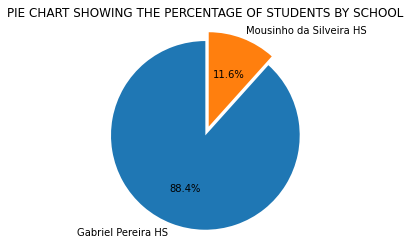

In [7]:
size = [349,46]
labels = 'Gabriel Pereira HS', 'Mousinho da Silveira HS'
explode = [0, 0.1]

fig, ax = plt.subplots()
ax.pie(size, labels = labels, explode = explode, autopct = '%1.1f%%', startangle = 90)
ax.axis('equal')
plt.title("PIE CHART SHOWING THE PERCENTAGE OF STUDENTS BY SCHOOL")
plt.show() 

* 88.4 percent of the students are from Gabriel Pereira
* 11.5 percent of the students are from Mousinho da Silveira

**SCHOOL AND FINAL GRADE**

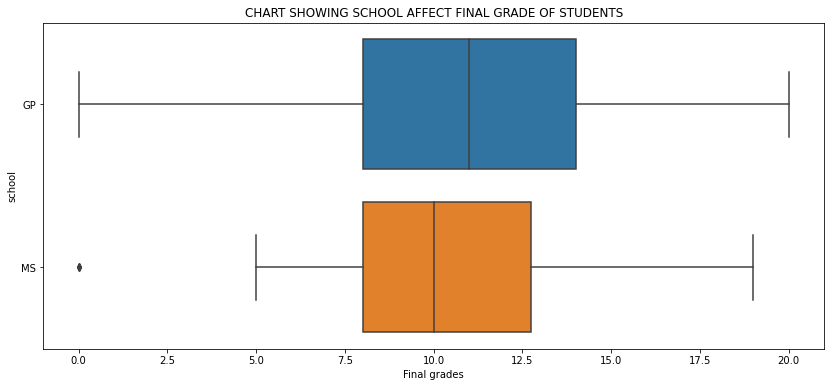

In [8]:
plt.figure(figsize = (14, 6))
sns.boxplot('G3', 'school', data = grades)
plt.title("CHART SHOWING SCHOOL AFFECT FINAL GRADE OF STUDENTS")
plt.xlabel('Final grades')
plt.show()

**OBSERVATION**

* From the diagram above, the school students' attend does not affect their final grade 

###SEX (sex)

**NUMBER OF STUDENTS BY GENDER**

In [9]:
grades['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

* There are 208 female students 
* There are 187 male students 

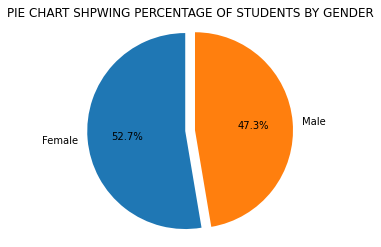

In [10]:
size = [208, 187]
labels = 'Female', 'Male'
explode = [0, 0.1]

fig1, ax1 = plt.subplots()
ax1.pie(size, labels = labels, explode = explode, autopct = '%1.1f%%', startangle = 90)
ax1.axis('equal')
plt.title("PIE CHART SHPWING PERCENTAGE OF STUDENTS BY GENDER")
plt.show()

**GENDER AND FINAL GRADE**

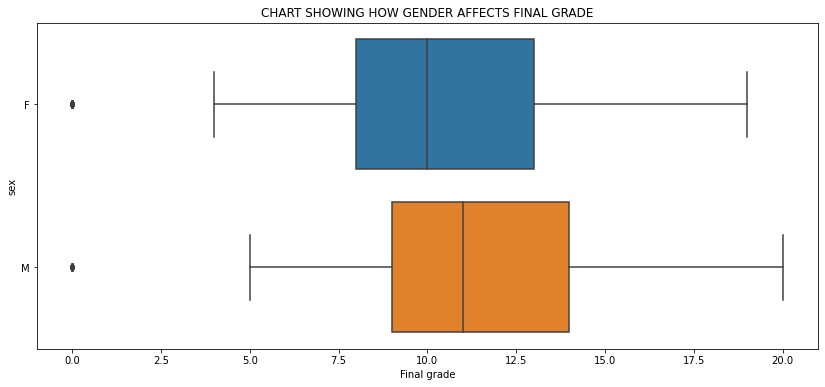

In [11]:
plt.figure(figsize = (14, 6))
sns.boxplot('G3', 'sex', data = grades)
plt.title("CHART SHOWING HOW GENDER AFFECTS FINAL GRADE")
plt.xlabel("Final grade")
plt.show()

**OBSERVATION**

* A female student had the lowest grade
* A male student had the highest grade
* The gender of the students does not affect their final grade much


###AGE (age)

**NUMBER OF STUDENTS BY AGE**

In [12]:
grades['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

* Majority of the students are 16 years old 

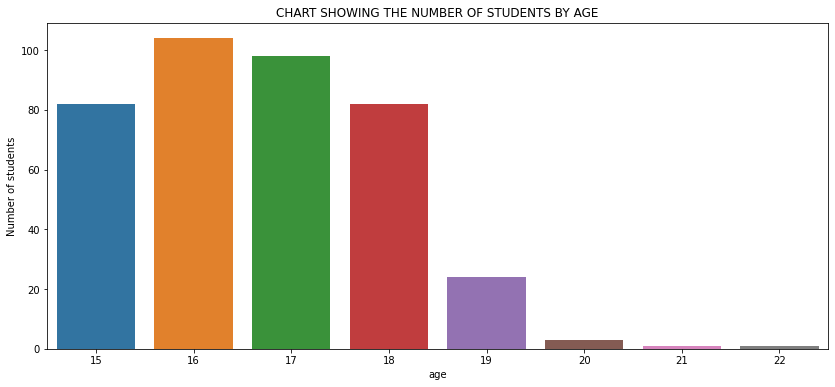

In [13]:
plt.figure(figsize = (14, 6))
sns.countplot('age', data = grades)
plt.title("CHART SHOWING THE NUMBER OF STUDENTS BY AGE")
plt.ylabel("Number of students")
plt.show()

**AGE AND FINAL GRADE**

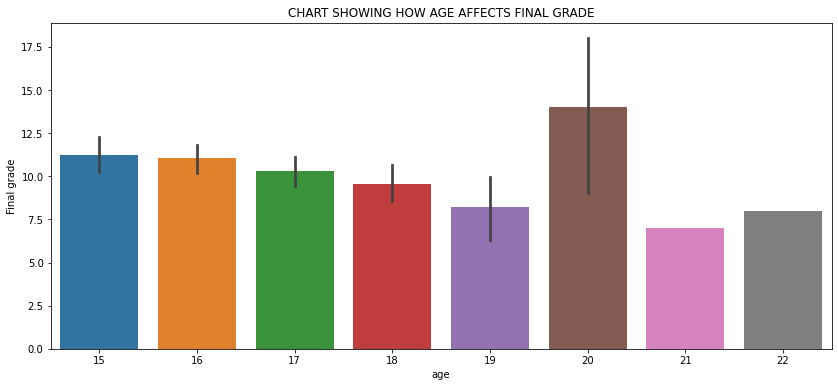

In [44]:
plt.figure(figsize = (14, 6))
sns.barplot('age', 'G3', data = grades)
plt.title("CHART SHOWING HOW AGE AFFECTS FINAL GRADE")
plt.ylabel("Final grade")
plt.show()

**OBSERVATION**

* The age of the students does not affect their final grade

###STUDENTS' ADDRESS TYPE (address)

**NUMBER OF STUDENTS BY ADDRESS TYPE**

In [15]:
grades.replace(to_replace = 'U', value = 'Urban', inplace = True)
grades.replace(to_replace = 'R', value = 'Rural', inplace = True)

In [16]:
grades['address'].value_counts()

Urban    307
Rural     88
Name: address, dtype: int64

* Majority of the studnets live in the urban area (307)

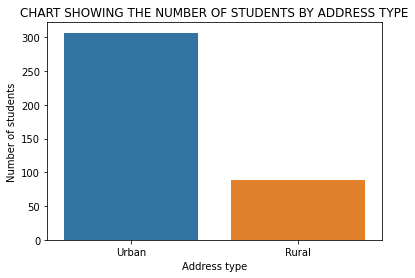

In [17]:
sns.countplot('address', data = grades)
plt.title("CHART SHOWING THE NUMBER OF STUDENTS BY ADDRESS TYPE")
plt.xlabel("Address type")
plt.ylabel("Number of students")
plt.show()

**ADDRESS TYPE AND FINAL GRADE**

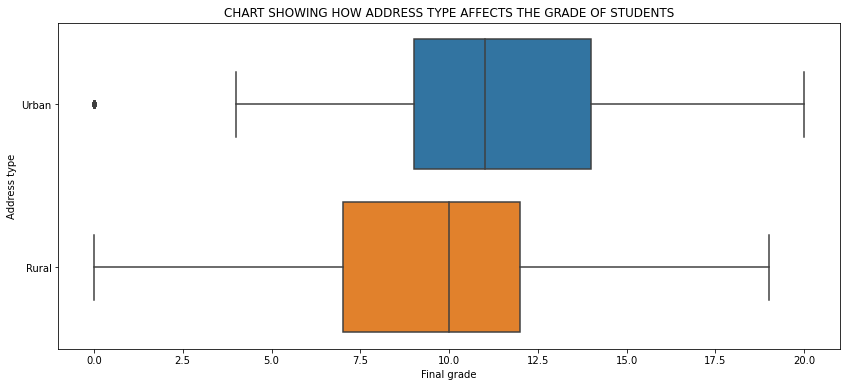

In [18]:
plt.figure(figsize = (14, 6))
sns.boxplot('G3', 'address', data = grades)
plt.title("CHART SHOWING HOW ADDRESS TYPE AFFECTS THE GRADE OF STUDENTS")
plt.xlabel("Final grade")
plt.ylabel("Address type")
plt.show()

**OBSERVATION**

* The address type affects the students' final grade to an extent
* Generally, students who lived in urban areas have better grades 

###FAMILY SIZE (famsize)

**NUMBER OF STUDENTS BY FAMILY SIZE**

In [19]:
grades.replace(to_replace = 'GT3', value = 'Greater than 3', inplace = True)
grades.replace(to_replace = 'LE3', value = 'Less than 3', inplace = True)

In [20]:
grades['famsize'].value_counts()

Greater than 3    281
Less than 3       114
Name: famsize, dtype: int64

* Most of the students have families that are greater than 3

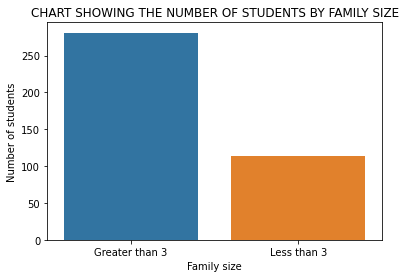

In [21]:
sns.countplot('famsize', data = grades)
plt.title("CHART SHOWING THE NUMBER OF STUDENTS BY FAMILY SIZE")
plt.xlabel("Family size")
plt.ylabel("Number of students")
plt.show()

**FAMILY SIZE AND FINAL GRADE**

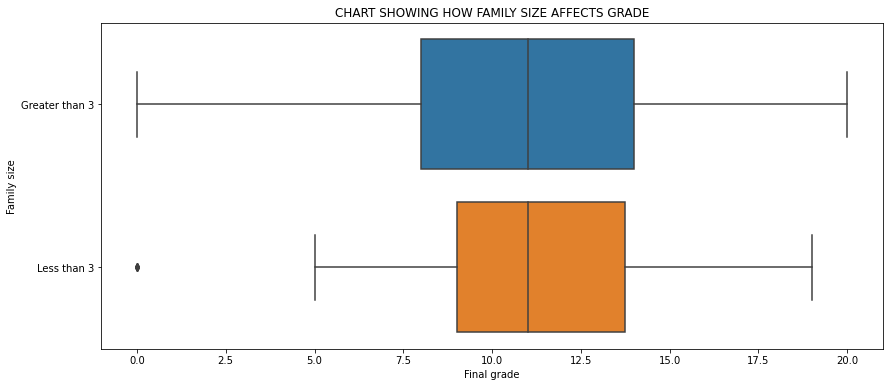

In [22]:
plt.figure(figsize = (14, 6))
sns.boxplot('G3', 'famsize', data = grades)
plt.title("CHART SHOWING HOW FAMILY SIZE AFFECTS GRADE")
plt.xlabel("Final grade")
plt.ylabel("Family size")
plt.show()

* The family size of the students does not affect the final grade of the students

###PARENTS COHABITATION STATUS (Pstatus)

**NUMBER OF STUDENTS BY PARENTS COHABITATION STATUS**

In [23]:
grades.replace(to_replace = 'T', value = 'Living together', inplace = True)
grades.replace(to_replace = 'A', value = 'Apart', inplace = True)

In [24]:
grades['Pstatus'].value_counts()

Living together    354
Apart               41
Name: Pstatus, dtype: int64

* Majority of the students have their parents living together 

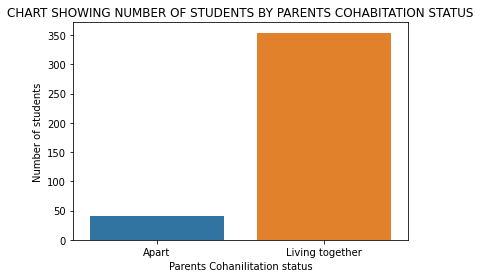

In [25]:
sns.countplot('Pstatus', data = grades)
plt.title("CHART SHOWING NUMBER OF STUDENTS BY PARENTS COHABITATION STATUS")
plt.xlabel("Parents Cohanilitation status")
plt.ylabel("Number of students")
plt.show()

**PARENTS COHABILITATION STATUS AND FINAL GRADE**

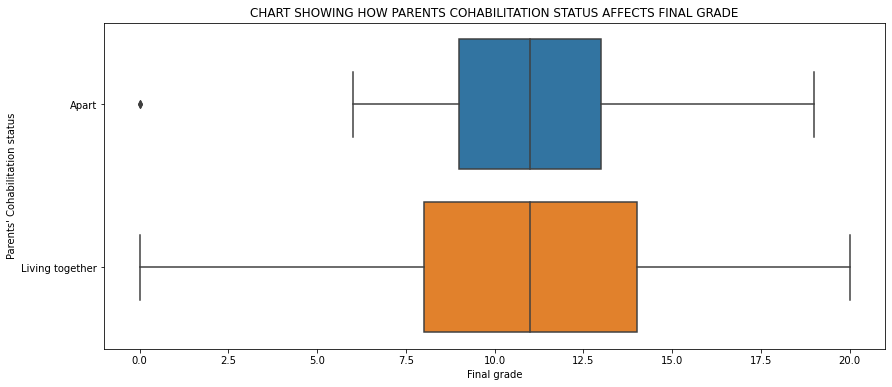

In [26]:
plt.figure(figsize = (14, 6))
sns.boxplot('G3', 'Pstatus', data = grades)
plt.title("CHART SHOWING HOW PARENTS COHABILITATION STATUS AFFECTS FINAL GRADE")
plt.xlabel('Final grade')
plt.ylabel("Parents' Cohabilitation status")
plt.show()

**OBSERVATION**

* Parents' cohabilitation status does not affect the final grade of the students 

###MOTHER'S EDUCATION (Medu) AND FATHHER'S EDUCATION (Fedu)

**NUMBER OF STUDENTS BY MOTHER'S EDUCATION**

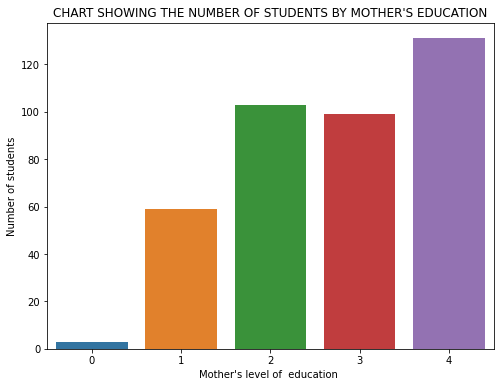

In [27]:
plt.figure(figsize = (8, 6))
sns.countplot('Medu', data = grades)
plt.title("CHART SHOWING THE NUMBER OF STUDENTS BY MOTHER'S EDUCATION")
plt.xlabel("Mother's level of  education ")
plt.ylabel("Number of students")
plt.show()

* Most students have very educated mothers 

**NUMBER OF STUDENTS BY FATHER'S EDUCATION**

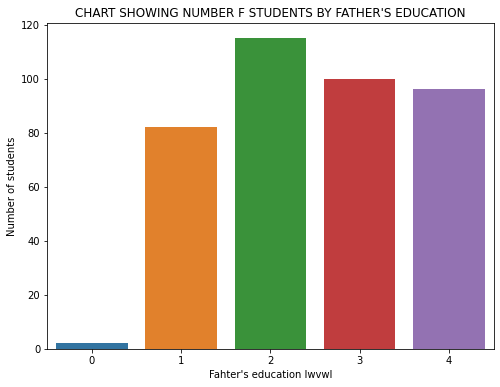

In [28]:
plt.figure(figsize = (8, 6))
sns.countplot('Fedu', data = grades)
plt.title("CHART SHOWING NUMBER F STUDENTS BY FATHER'S EDUCATION")
plt.xlabel("Fahter's education lwvwl")
plt.ylabel("Number of students")
plt.show()

**MOTHER'S EDUCATION AND FINAL GRADE**

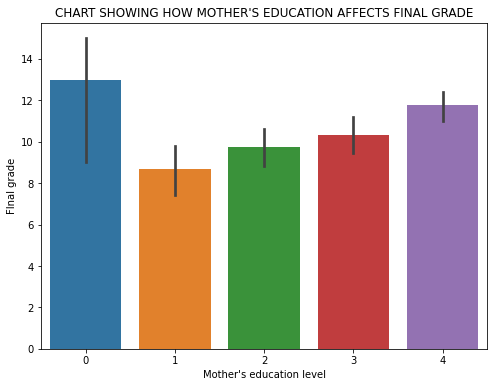

In [29]:
plt.figure(figsize = (8, 6))
sns.barplot('Medu', 'G3', data = grades)
plt.title("CHART SHOWING HOW MOTHER'S EDUCATION AFFECTS FINAL GRADE")
plt.xlabel("Mother's education level")
plt.ylabel("FInal grade")
plt.show()

* Vast majority of the students have educated fathers

**FATHER'S EDUCATION AND FINAL GRADE**

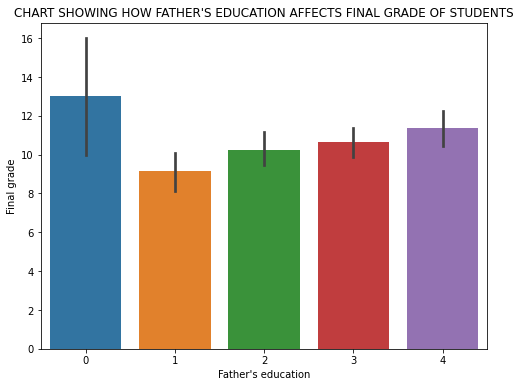

In [30]:
plt.figure(figsize = (8, 6))
sns.barplot('Fedu', 'G3', data = grades)
plt.title("CHART SHOWING HOW FATHER'S EDUCATION AFFECTS FINAL GRADE OF STUDENTS")
plt.xlabel("Father's education")
plt.ylabel("Final grade")
plt.show()

**OBSERVATION**

* Father's education does not affect the final grade of students
* Mother's education does not affect the final grade of students

###MOTHER'S JOB (Mjob) AND FATHER'S JOB (Fjob)

**NUMBER OF STUDENTS BY MOTHER'S AND FATHER'S JOB**

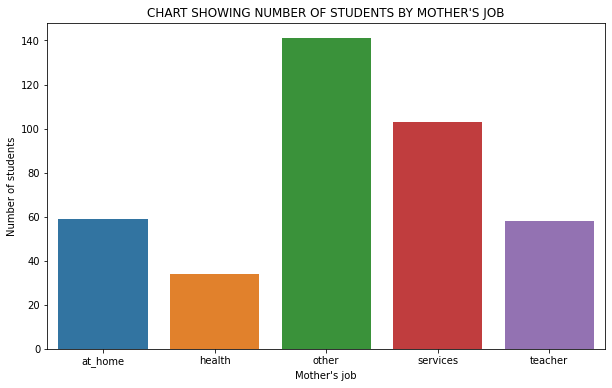

In [31]:
plt.figure(figsize = (10, 6))
sns.countplot('Mjob', data = grades)
plt.title("CHART SHOWING NUMBER OF STUDENTS BY MOTHER'S JOB")
plt.xlabel("Mother's job")
plt.ylabel("Number of students")
plt.show()

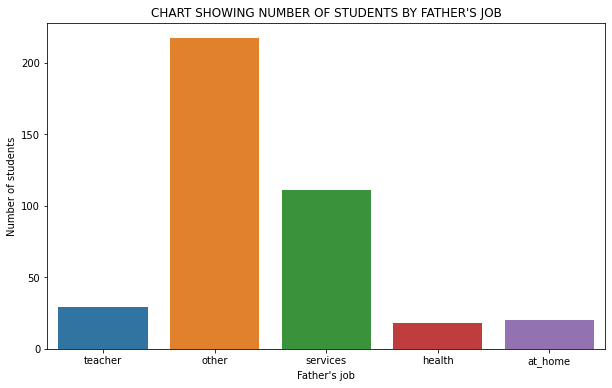

In [32]:
plt.figure(figsize = (10, 6))
sns.countplot('Fjob', data = grades)
plt.title("CHART SHOWING NUMBER OF STUDENTS BY FATHER'S JOB")
plt.xlabel("Father's job")
plt.ylabel("Number of students")
plt.show()

* In the above diagram, the distibution of parents jobs can be seen

**MOTHER'S JOB AND FINAL GRADE**

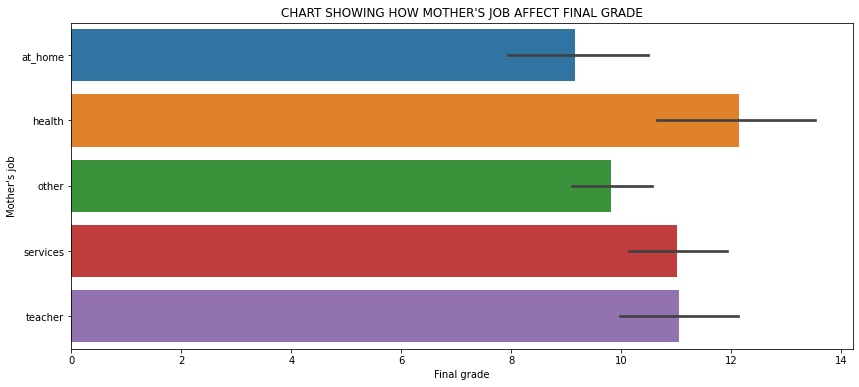

In [33]:
plt.figure(figsize = (14, 6))
sns.barplot('G3', 'Mjob', data = grades)
plt.title("CHART SHOWING HOW MOTHER'S JOB AFFECT FINAL GRADE")
plt.xlabel("Final grade")
plt.ylabel("Mother's job")
plt.show()

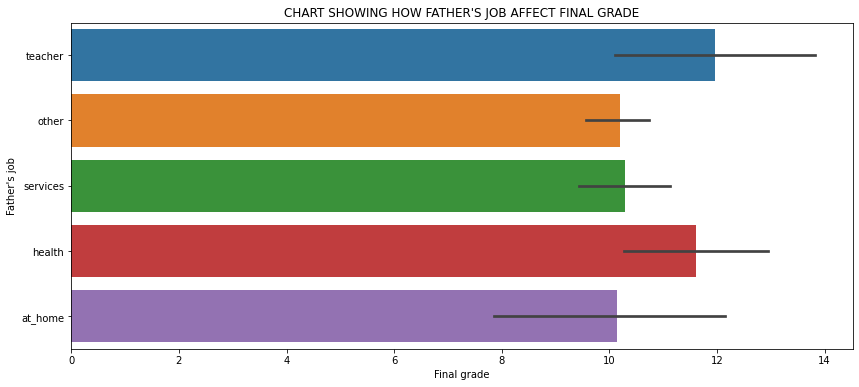

In [34]:
plt.figure(figsize = (14, 6))
sns.barplot('G3', 'Fjob', data = grades)
plt.title("CHART SHOWING HOW FATHER'S JOB AFFECT FINAL GRADE")
plt.xlabel("Final grade")
plt.ylabel("Father's job")
plt.show()

**OBSERVATION**

* Father's job does not affect final grade of students
* Mother's job does not affect the final grade of students

###REASON TO CHOOSE THE SCHOOL (reason)

In [35]:
grades['reason'].replace(to_replace = 'home', value = 'Close to home', inplace = True)
grades['reason'].replace(to_replace = 'course', value = 'Course preference', inplace = True)
grades['reason'].replace(to_replace = 'reputation', value = 'School reputation', inplace = True)

**NUMBER OF STUDENT BY REASON FOR CHOOSING SCHOOL**

In [36]:
grades['reason'].value_counts()

Course preference    145
Close to home        109
School reputation    105
other                 36
Name: reason, dtype: int64

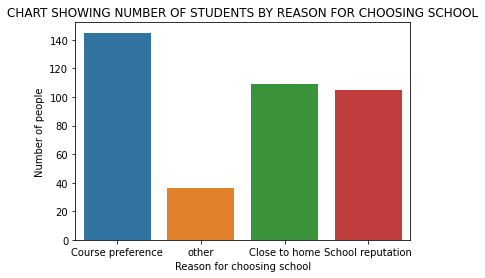

In [37]:
sns.countplot('reason', data = grades)
plt.title("CHART SHOWING NUMBER OF STUDENTS BY REASON FOR CHOOSING SCHOOL")
plt.xlabel("Reason for choosing school")
plt.ylabel("Number of people")
plt.show()

**REASON FOR CHOOSING SCHOOL AND FINAL GRADE**

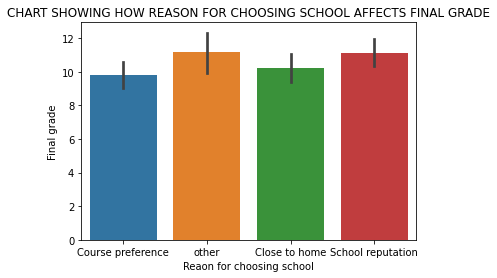

In [38]:
sns.barplot('reason', 'G3', data = grades)
plt.title("CHART SHOWING HOW REASON FOR CHOOSING SCHOOL AFFECTS FINAL GRADE")
plt.xlabel("Reaon for choosing school")
plt.ylabel("Final grade")
plt.show()

**OBSERVARTION**

* Reson for choosing school does not affect the final grade 

###GUARDIAN (guardian)

**HOW GUARDIAN TYPE AFFECTS FINAL GRADES**

In [39]:
grades['guardian'].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

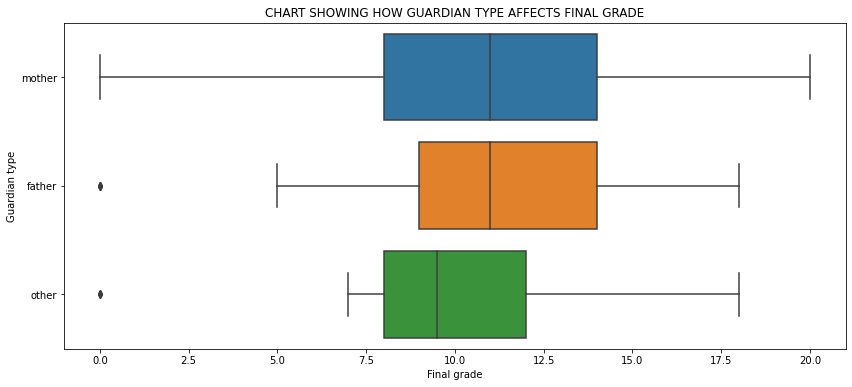

In [40]:
plt.figure(figsize = (14, 6))
sns.boxplot('G3', 'guardian', data = grades)
plt.title("CHART SHOWING HOW GUARDIAN TYPE AFFECTS FINAL GRADE")
plt.xlabel("Final grade")
plt.ylabel("Guardian type")
plt.show()

* Guardian type does not affect the final grade of students

###HOME TO SCHOOL TRAVEL TIME (traveltime)

**HOW TRAVEL TIME AFFECTS FINAL GRADE**

In [41]:
grades['traveltime'].value_counts()

1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64

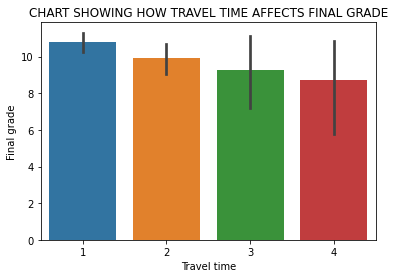

In [42]:
sns.barplot('traveltime', 'G3', data = grades)
plt.title("CHART SHOWING HOW TRAVEL TIME AFFECTS FINAL GRADE")
plt.xlabel("Travel time")
plt.ylabel("Final grade")
plt.show()

* Travel time does not affect the final grades of students much

###STUDY TIME (studytime)

**HOW STUDY TIME AFFECTS FINAL GRADES**

In [45]:
grades['studytime'].unique()

array([2, 3, 1, 4])

In [46]:
grades['studytime'].value_counts()

2    198
1    105
3     65
4     27
Name: studytime, dtype: int64

* Most of the students study for 2 hours

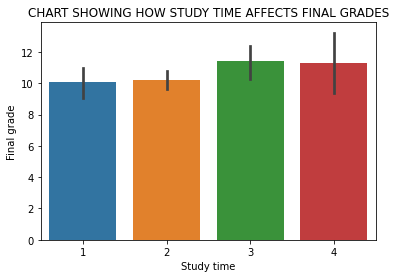

In [50]:
sns.barplot('studytime', 'G3', data = grades)
plt.title('CHART SHOWING HOW STUDY TIME AFFECTS FINAL GRADES')
plt.xlabel("Study time")
plt.ylabel("Final grade")
plt.show()

**OBSERVATION**

* Study time does not affect final grades

###NUMBER OF PAST CLASS FAILURES (failures)

**HOW PAST FAILURES AFFECT FINAL GRADES**

In [51]:
grades['failures'].value_counts()

0    312
1     50
2     17
3     16
Name: failures, dtype: int64

* Most of the students have never failed 

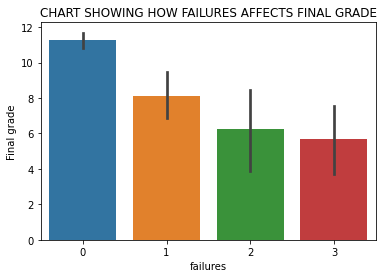

In [54]:
sns.barplot('failures', 'G3', data = grades)
plt.title("CHART SHOWING HOW FAILURES AFFECTS FINAL GRADE")
plt.ylabel("Final grade")
plt.show()

* Students who never failed have better final grades 

**OBSERVATION**

* Number of past failures affect the final grades of students 

###EXTRA EDUCATIONAL SUPPORT (schoolsup)

In [55]:
grades['schoolsup'].value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

* Most of the students do not have ectra educational support 

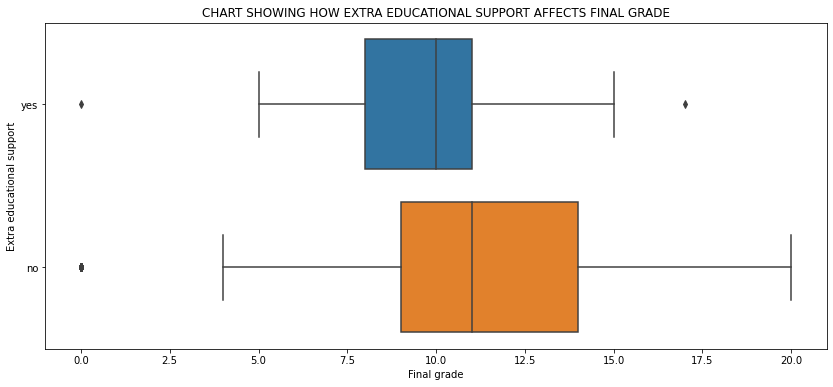

In [56]:
plt.figure(figsize = (14, 6))
sns.boxplot('G3', 'schoolsup', data = grades)
plt.title("CHART SHOWING HOW EXTRA EDUCATIONAL SUPPORT AFFECTS FINAL GRADE")
plt.xlabel("Final grade")
plt.ylabel("Extra educational support")
plt.show()

* Students without extra educational support had way better final grades 

**OBSERVATION**

* Extra educational support affects the final grade of students

###FAMILY EDUCATIONAL SUPPORT (famsup)

In [58]:
grades['famsup'].value_counts()

yes    242
no     153
Name: famsup, dtype: int64

* More students have family educational support

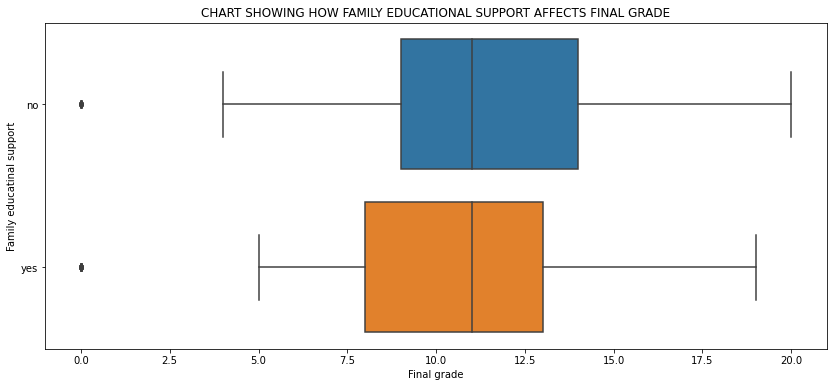

In [59]:
plt.figure(figsize = (14, 6))
sns.boxplot('G3', 'famsup', data = grades)
plt.title("CHART SHOWING HOW FAMILY EDUCATIONAL SUPPORT AFFECTS FINAL GRADE")
plt.xlabel("Final grade")
plt.ylabel("Family educatinal support")
plt.show()

**OBSERVATION**

* Family educational support dosent affect the final grades of students much 

###EXTRA PAID CLASSES (paid)

In [60]:
grades['paid'].value_counts()

no     214
yes    181
Name: paid, dtype: int64

* Students who dont take extra paid classes are more than those who take extra paid classes

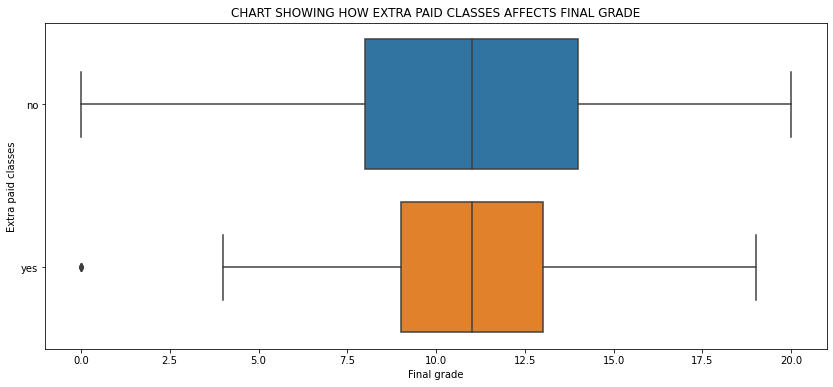

In [61]:
plt.figure(figsize = (14, 6))
sns.boxplot('G3', 'paid', data = grades)
plt.title("CHART SHOWING HOW EXTRA PAID CLASSES AFFECTS FINAL GRADE")
plt.xlabel("Final grade")
plt.ylabel("Extra paid classes")
plt.show()

**OBSERVATION**

* Extra paid classes does not affect the final grades of students

###EXTRA CURRICULAR ACTIVITIES (activities)

In [62]:
grades.activities.value_counts()

yes    201
no     194
Name: activities, dtype: int64

* More students perform in extra curricular activities

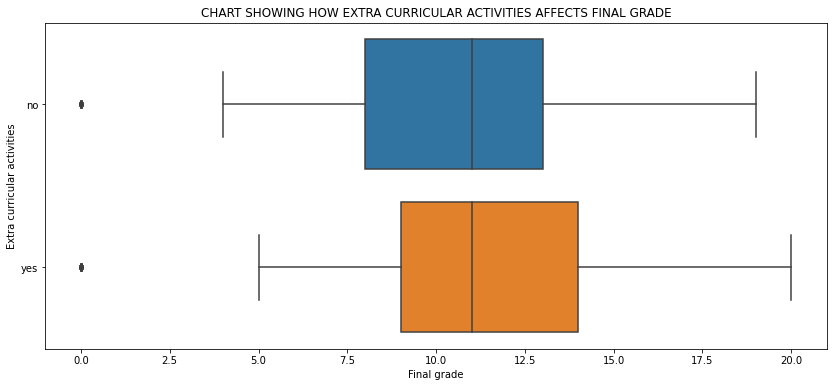

In [63]:
plt.figure(figsize = (14, 6))
sns.boxplot('G3', 'activities', data = grades)
plt.title("CHART SHOWING HOW EXTRA CURRICULAR ACTIVITIES AFFECTS FINAL GRADE")
plt.xlabel("Final grade")
plt.ylabel("Extra curricular activities")
plt.show()

**OBSERVATION**

* Extra curricular activities does not affect the final grades of students 

###NURSERY SCHOOL ATTENDANCE (nursery)

In [64]:
grades.nursery.value_counts()

yes    314
no      81
Name: nursery, dtype: int64

* Majority of the students attended Nursery School

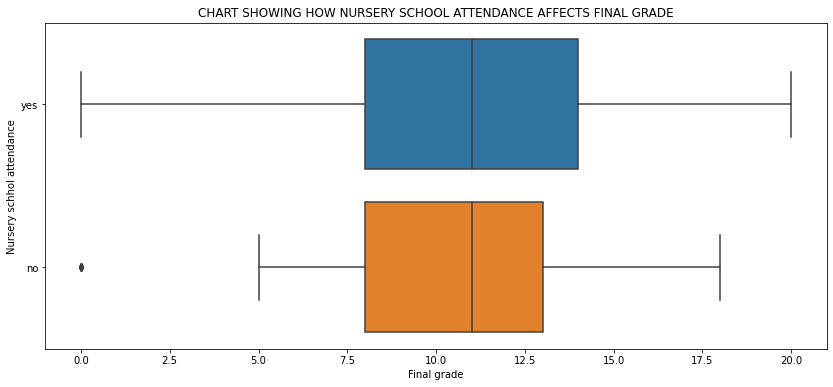

In [65]:
plt.figure(figsize = (14, 6))
sns.boxplot('G3', 'nursery', data = grades)
plt.title("CHART SHOWING HOW NURSERY SCHOOL ATTENDANCE AFFECTS FINAL GRADE")
plt.xlabel("Final grade")
plt.ylabel("Nursery schhol attendance")
plt.show()

**OBSERVATION**

* Nursery school attendance does not affect the final grades of students

###WILLINNESS TO TAKE HIGHER EDUCATION (higher)

In [66]:
grades.higher.value_counts()

yes    375
no      20
Name: higher, dtype: int64

* Most of the studentsare willing to take higher education